In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

In [74]:
df = pd.read_csv('/Users/mahmoud/Car_Price_Prediction/car_data_cleaned.csv')

In [75]:
df

,Unnamed: 0,Name,Mileage,Dealer Name,Rating,Review Count,Price,Year,Make,Model,Type
0,0,2015 Ford C-Max Hybrid SEL,"88,380 mi.",Capitol Kia,3.8,(180 reviews),10998.0,2015,Ford C,SEL,Hybrid SEL
1,1,2016 Kia Sorento LX,"100,837 mi.",Napleton Mazda of Naperville,3.9,(115 reviews),12577.0,2016,Kia Sorento LX,LX,LX
2,2,2016 Mitsubishi Lancer ES,"133,750 mi.",AVA Auto Sales,0.0,(8 reviews),8495.0,2016,Mitsubishi Lancer ES,ES,ES
3,3,2011 Ford Escape XLT,"110,862 mi.",94 Nissan Of South Holland,4.7,"(2,682 reviews)",7869.0,2011,Ford Escape XLT,XLT,XLT
4,4,2017 Dodge Journey SXT,"58,595 mi.",Lithia Chrysler Jeep Dodge Ram of Wasilla,4.6,(543 reviews),14888.0,2017,Dodge Journey SXT,SXT,SXT
...,...,...,...,...,...,...,...,...,...,...,...
10033,10035,2014 Chevrolet Silverado 1500 LT,"158,598 mi.",City Auto Sales Corp,0.0,(1 review),13995.0,2014,Chevrolet Silverado,LT,1500 LT
10034,10036,2019 Hyundai Sonata SE,"113,581 mi.",Auto Boutique,4.8,"(1,074 reviews)",13500.0,2019,Hyundai Sonata SE,SE,SE
10035,10037,2013 Dodge Journey SXT,"197,496 mi.",Ryan Auto Mall Chrysler Dodge Jeep Ram Of Mont...,0.0,(29 reviews),7425.0,2013,Dodge Journey SXT,SXT,SXT
10036,10038,2007 Lexus ES 350,"85,384 mi.","Mountain Motors, Inc",0.0,(7 reviews),11995.0,2007,Lexus ES,NaN,350


In [76]:
df = df.drop(columns=['Unnamed: 0'])

In [77]:
df

,Name,Mileage,Dealer Name,Rating,Review Count,Price,Year,Make,Model,Type
0,2015 Ford C-Max Hybrid SEL,"88,380 mi.",Capitol Kia,3.8,(180 reviews),10998.0,2015,Ford C,SEL,Hybrid SEL
1,2016 Kia Sorento LX,"100,837 mi.",Napleton Mazda of Naperville,3.9,(115 reviews),12577.0,2016,Kia Sorento LX,LX,LX
2,2016 Mitsubishi Lancer ES,"133,750 mi.",AVA Auto Sales,0.0,(8 reviews),8495.0,2016,Mitsubishi Lancer ES,ES,ES
3,2011 Ford Escape XLT,"110,862 mi.",94 Nissan Of South Holland,4.7,"(2,682 reviews)",7869.0,2011,Ford Escape XLT,XLT,XLT
4,2017 Dodge Journey SXT,"58,595 mi.",Lithia Chrysler Jeep Dodge Ram of Wasilla,4.6,(543 reviews),14888.0,2017,Dodge Journey SXT,SXT,SXT
...,...,...,...,...,...,...,...,...,...,...
10033,2014 Chevrolet Silverado 1500 LT,"158,598 mi.",City Auto Sales Corp,0.0,(1 review),13995.0,2014,Chevrolet Silverado,LT,1500 LT
10034,2019 Hyundai Sonata SE,"113,581 mi.",Auto Boutique,4.8,"(1,074 reviews)",13500.0,2019,Hyundai Sonata SE,SE,SE
10035,2013 Dodge Journey SXT,"197,496 mi.",Ryan Auto Mall Chrysler Dodge Jeep Ram Of Mont...,0.0,(29 reviews),7425.0,2013,Dodge Journey SXT,SXT,SXT
10036,2007 Lexus ES 350,"85,384 mi.","Mountain Motors, Inc",0.0,(7 reviews),11995.0,2007,Lexus ES,NaN,350


In [81]:
# Having the mileage column in float rather than string

df['Mileage'] = df['Mileage'].str.replace(' mi.', '').str.replace(',', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
print(df['Mileage'])

0         88380
1        100837
2        133750
3        110862
4         58595
          ...  
10033    158598
10034    113581
10035    197496
10036     85384
10037    133800
Name: Mileage, Length: 10038, dtype: int64


In [82]:
df

,Name,Mileage,Dealer Name,Rating,Review Count,Price,Year,Make,Model,Type
0,2015 Ford C-Max Hybrid SEL,88380,Capitol Kia,3.8,180.0,10998.0,2015,Ford C,SEL,Hybrid SEL
1,2016 Kia Sorento LX,100837,Napleton Mazda of Naperville,3.9,115.0,12577.0,2016,Kia Sorento LX,LX,LX
2,2016 Mitsubishi Lancer ES,133750,AVA Auto Sales,0.0,8.0,8495.0,2016,Mitsubishi Lancer ES,ES,ES
3,2011 Ford Escape XLT,110862,94 Nissan Of South Holland,4.7,2682.0,7869.0,2011,Ford Escape XLT,XLT,XLT
4,2017 Dodge Journey SXT,58595,Lithia Chrysler Jeep Dodge Ram of Wasilla,4.6,543.0,14888.0,2017,Dodge Journey SXT,SXT,SXT
...,...,...,...,...,...,...,...,...,...,...
10033,2014 Chevrolet Silverado 1500 LT,158598,City Auto Sales Corp,0.0,1.0,13995.0,2014,Chevrolet Silverado,LT,1500 LT
10034,2019 Hyundai Sonata SE,113581,Auto Boutique,4.8,1074.0,13500.0,2019,Hyundai Sonata SE,SE,SE
10035,2013 Dodge Journey SXT,197496,Ryan Auto Mall Chrysler Dodge Jeep Ram Of Mont...,0.0,29.0,7425.0,2013,Dodge Journey SXT,SXT,SXT
10036,2007 Lexus ES 350,85384,"Mountain Motors, Inc",0.0,7.0,11995.0,2007,Lexus ES,NaN,350


In [79]:
# Having Review count to float
df['Review Count'] = df['Review Count'].str.replace(r'\D', '', regex=True).astype(float)
print(df['Review Count'])

0         180.0
1         115.0
2           8.0
3        2682.0
4         543.0
          ...  
10033       1.0
10034    1074.0
10035      29.0
10036       7.0
10037      25.0
Name: Review Count, Length: 10038, dtype: float64


# Linear Regression Model on just Mileage & Price

In [28]:
X = df[['Mileage']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
linear_reg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
linear_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [30]:
y_pred_linear = linear_reg_pipeline.predict(X_test)

In [34]:
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)
print(rmse_linear)
print(r2_linear)

2669.585677267203
0.149793515809722


# Linear Regression Model using all columns

In [35]:
# X = df[['Mileage', 'Rating', 'Review Count', 'Year']]
# y = df['Price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
linear_reg_pipeline.fit(X_train, y_train)

In [37]:
y_pred_linears = linear_reg_pipeline.predict(X_test)

In [38]:
rmse_linears = mean_squared_error(y_test, y_pred_linears, squared=False)
r2_linears = r2_score(y_test, y_pred_linears)
print(rmse_linears)
print(r2_linears)

2558.871058409426
0.21885170298259604


# Decision Tree

In [89]:
X = df[['Mileage', 'Rating', 'Review Count', 'Year']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
dt_reg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeRegressor())])
dt_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [91]:
y_pred_dt = dt_reg_pipeline.predict(X_test)

In [92]:
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)
print(rmse_dt)
print(r2_dt)

3443.5902998740216
-0.41468463692726276


# Random Forest

In [45]:
X = df[['Mileage', 'Rating', 'Review Count', 'Year']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf_reg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor())])
rf_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [47]:
y_pred_rf = rf_reg_pipeline.predict(X_test)

In [49]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(rmse_rf)
print(r2_rf)

2546.399420067465
0.22644759793819902


# Tuned model on Random Forest 

In [83]:
X = df[['Mileage', 'Rating', 'Review Count', 'Year']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
rf_reg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor())])

param_dist = {
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_features': ['auto', 'sqrt'],
    'model__max_depth': [None, 10, 20, 30, 40, 50],  
    'model__min_samples_split': [2, 5, 10],  
    'model__min_samples_leaf': [1, 2, 4]  
}

In [85]:
# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(rf_reg_pipeline, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [None, 10, 20, 30,
                                                             40, 50],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500]},
                   random_state=42)

In [86]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': None}


In [87]:
best_model = random_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

In [88]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)

Random Forest Regressor (with Hyperparameter Tuning):
Root Mean Squared Error: 2454.6955968549228
R-squared: 0.2811604348190099


- slightly better, barely by much

# Gradient Boost

In [94]:
X = df[['Mileage', 'Rating', 'Review Count', 'Year']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
gb_reg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', GradientBoostingRegressor())])
param_grid = {
    'model__n_estimators': [100, 200, 300, 400, 500],  
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'model__max_depth': [3, 4, 5, 6],  
}

In [96]:
grid_search = GridSearchCV(gb_reg_pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__n_estimators': [100, 200, 300, 400, 500]})

In [97]:
best_params_gb = grid_search.best_params_
print("Best Hyperparameters (Gradient Boosting):", best_params_gb)

Best Hyperparameters (Gradient Boosting): {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 300}


In [98]:
best_model_gb = grid_search.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)

In [99]:
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor (with Hyperparameter Tuning):")
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Regressor (with Hyperparameter Tuning):
Root Mean Squared Error: 2449.437422552688
R-squared: 0.2842367717945361


In [109]:
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

rmse_mlp = sqrt(mean_squared_error(y_test, y_pred_mlp))
r_squared_mlp = r2_score(y_test, y_pred_mlp)

print("MLP RMSE:", rmse_mlp)
print("MLP R-squared:", r_squared_mlp)


MLP RMSE: 2650.464405855152
MLP R-squared: 0.16192933709855384


In [124]:
df.head()

,Name,Mileage,Dealer Name,Rating,Review Count,Price,Year,Type,Make_ Acura ILX,Make_ Acura ILX AcuraWatch Plus Package,...,Model_trans,Model_x,Model_xDrive,Model_xDrive28i,Model_xDrive30i,Model_xDrive35d,Model_xDrive35i,Model_xDrive48i,Model_xDrive50i,Model_xi
0,2015 Ford C-Max Hybrid SEL,88380,Capitol Kia,3.8,180.0,10998.0,2015,Hybrid SEL,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016 Kia Sorento LX,100837,Napleton Mazda of Naperville,3.9,115.0,12577.0,2016,LX,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016 Mitsubishi Lancer ES,133750,AVA Auto Sales,0.0,8.0,8495.0,2016,ES,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011 Ford Escape XLT,110862,94 Nissan Of South Holland,4.7,2682.0,7869.0,2011,XLT,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017 Dodge Journey SXT,58595,Lithia Chrysler Jeep Dodge Ram of Wasilla,4.6,543.0,14888.0,2017,SXT,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# Check for columns with non-numeric data types
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns
print(non_numeric_columns)


Index(['Type'], dtype='object')


In [138]:
# One-hot encode the 'Type' column
df_encoded = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Check for any remaining non-numeric columns
non_numeric_columns = df_encoded.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns
print(non_numeric_columns)


Index([], dtype='object')


In [139]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 36.1min finished


Best Hyperparameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Root Mean Squared Error: 2233.7917995450757
R-squared: 0.4047189327124795


In [145]:
importances_rf = best_rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_df_rf.head(10))

           Feature  Importance
3             Year    0.326597
0          Mileage    0.243123
2     Review Count    0.042139
1           Rating    0.019752
1713      Model_SE    0.012610
433   Make_ Ford F    0.010526
1521     Model_Cab    0.008125
381    Make_ FIAT     0.007245
1708       Model_S    0.006630
2849       Type_SE    0.005582


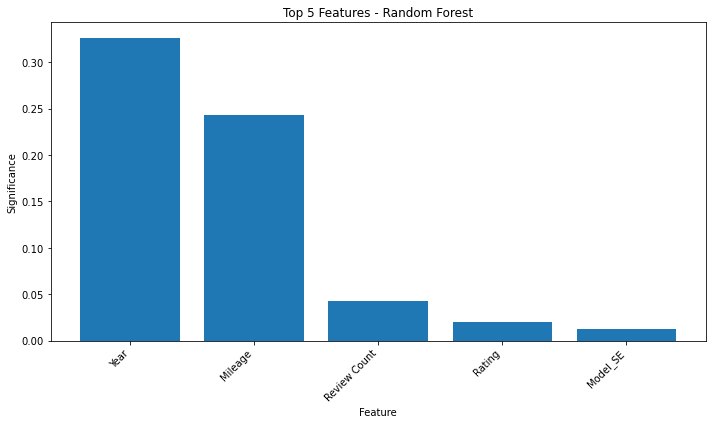

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_rf['Feature'][:5], feature_importance_df_rf['Importance'][:5])
plt.xlabel('Feature')
plt.ylabel('Significance')
plt.title('Top 5 Features - Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# XG Boost 

In [150]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = xgb.XGBRegressor(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("RMSE:", rmse_xgb)
print("R-squared for XGBoost:", r2_xgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 94.2min finished


Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}
Root Mean Squared Error for XGBoost: 1984.258745738237
R-squared for XGBoost: 0.5302862300690967


In [153]:
# Feature Importance for XGBoost
importances_xgb = best_xgb_model.feature_importances_
feature_importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_xgb})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
print(feature_importance_df_xgb.head(10))

                         Feature  Importance
916   Make_ Mitsubishi Lancer DE    0.005870
3121                    Type_XLT    0.005789
2849                     Type_SE    0.005230
1886                Type_1500 LT    0.005085
1713                    Model_SE    0.005071
1636                   Model_LTZ    0.004894
1684               Model_Premier    0.004890
1597                   Model_GLS    0.004781
1785                    Model_V6    0.004326
2636                     Type_LE    0.004230


In [155]:
df.to_csv('/Users/mahmoud/Car_Price_Prediction/car_encoded_best_basic_model.csv')

In [136]:
df.head()

,Mileage,Rating,Review Count,Price,Year,Type,Make_ Acura ILX,Make_ Acura ILX AcuraWatch Plus Package,Make_ Acura ILX Base,Make_ Acura ILX Hybrid,...,Model_trans,Model_x,Model_xDrive,Model_xDrive28i,Model_xDrive30i,Model_xDrive35d,Model_xDrive35i,Model_xDrive48i,Model_xDrive50i,Model_xi
0,88380,3.8,180.0,10998.0,2015,Hybrid SEL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100837,3.9,115.0,12577.0,2016,LX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,133750,0.0,8.0,8495.0,2016,ES,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110862,4.7,2682.0,7869.0,2011,XLT,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58595,4.6,543.0,14888.0,2017,SXT,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
